# SMBCグループ GREEN×DATA チャレンジ2025へようこそ！

## 本チュートリアルの流れ

1. **Colabのセットアップ・データの読み込み**
2. **探索的データ分析**  
   - データを操作しながら、特徴量の選択・作成を行います。
3. **ルールの理解・OK/NGの体的な処理例**
   - “未来データの混入(=リーク)” とは何かをOK/NGの例（実際のコード）を見ながら把握します。
4. **モデリング**  
   - 3のOKの前処理を行い、線形回帰でモデリングを行います。
5. **予測・投稿**  
   - testデータの予測を行い、投稿ファイルを作成します。

---

* チュートリアルで使用するNotebookは「データ」ページからダウンロード可能です。
* 皆様の挑戦を心よりお待ちしております！

## 1-2.ライブラリの読み込み

ライブラリを読み込むことで、pythonがある特定の分野に特化した処理を行うことができるようになります。<br>
このチュートリアルノートブックに必要なライブラリを読み込みましょう。<br>
今使用するライブラリの全てを読み込まなくても、必要に応じて都度ライブラリを読み込みながら進めることもできます。

In [1]:
# ライブラリのインポート
import os
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

warnings.filterwarnings("ignore")

<h2> 1-3.データの読み込み</h2>

<p>それではデータを読み込んでみましょう。<br>
データを読み込むには pd.read_csv() を使います。<br>
マイドライブは/content/drive/の中にあるので、trainデータまでのパスは以下のようになります。</p>

In [2]:
class Paths:
    p = "../data/"

    train = p + "train.csv"
    test = p + "test.csv"
    sample_submission = p + "sample_submit.csv"

In [3]:
train_df = pd.read_csv(Paths.train, index_col=0)
test_df = pd.read_csv(Paths.test, index_col=0)

これでデータを読み込むことができました！<br>以下のコードでどのようなデータが格納されているのかを確認します。

In [4]:
# 概要を確認
print("\n--- 学習データ (train_df) ---")
print(f"shape: {train_df.shape}")
train_df.head()


--- 学習データ (train_df) ---
shape: (26280, 91)


generation_biomass  \
time                                            
2015-01-02 00:00:00+01:00               447.0   
2015-01-02 01:00:00+01:00               449.0   
2015-01-02 02:00:00+01:00               448.0   
2015-01-02 03:00:00+01:00               438.0   
2015-01-02 04:00:00+01:00               428.0   

                           generation_fossil_brown_coal/lignite  \
time                                                              
2015-01-02 00:00:00+01:00                                 329.0   
2015-01-02 01:00:00+01:00                                 328.0   
2015-01-02 02:00:00+01:00                                 323.0   
2015-01-02 03:00:00+01:00                                 254.0   
2015-01-02 04:00:00+01:00                                 187.0   

                           generation_fossil_gas  generation_fossil_hard_coal  \
time                                                                            
2015-01-02 00:00:00+01:00                 4844.0                       4821.0   
2015-01-02 01:00:00+01:00                 5196.0                       4755.0   
2015-01-02 02:00:00+01:00                 4857.0                       4581.0   
2015-01-02 03:00:00+01:00                 4314.0                       4131.0   
2015-01-02 04:00:00+01:00                 4130.0                       3840.0   

                           generation_fossil_oil  \
time                                               
2015-01-02 00:00:00+01:00                  162.0   
2015-01-02 01:00:00+01:00                  158.0   
2015-01-02 02:00:00+01:00                  157.0   
2015-01-02 03:00:00+01:00                  160.0   
2015-01-02 04:00:00+01:00                  156.0   

                           generation_hydro_pumped_storage_consumption  \
time                                                                     
2015-01-02 00:00:00+01:00                                        863.0   
2015-01-02 01:00:00+01:00                                        920.0   
2015-01-02 02:00:00+01:00                                       1164.0   
2015-01-02 03:00:00+01:00                                       1503.0   
2015-01-02 04:00:00+01:00                                       1826.0   

                           generation_hydro_run_of_river_and_poundage  \
time                                                                    
2015-01-02 00:00:00+01:00                                      1051.0   
2015-01-02 01:00:00+01:00                                      1009.0   
2015-01-02 02:00:00+01:00                                       973.0   
2015-01-02 03:00:00+01:00                                       949.0   
2015-01-02 04:00:00+01:00                                       953.0   

                           generation_hydro_water_reservoir  \
time                                                          
2015-01-02 00:00:00+01:00                            1899.0   
2015-01-02 01:00:00+01:00                            1658.0   
2015-01-02 02:00:00+01:00                            1371.0   
2015-01-02 03:00:00+01:00                             779.0   
2015-01-02 04:00:00+01:00                             720.0   

                           generation_nuclear  generation_other  ...  \
time                                                             ...   
2015-01-02 00:00:00+01:00              7096.0              43.0  ...   
2015-01-02 01:00:00+01:00              7096.0              43.0  ...   
2015-01-02 02:00:00+01:00              7099.0              43.0  ...   
2015-01-02 03:00:00+01:00              7098.0              43.0  ...   
2015-01-02 04:00:00+01:00              7097.0              43.0  ...   

                           seville_wind_deg  seville_rain_1h  seville_rain_3h  \
time                                                                            
2015-01-02 00:00:00+01:00                33              0.0              0.0   
2015-01-02 01:00:00+01:00                33              0.

In [5]:
print("\n--- テストデータ (test_df) ---")
print(f"shape: {test_df.shape}")
test_df.head()


--- テストデータ (test_df) ---
shape: (8760, 90)


generation_biomass  \
time                                            
2018-01-01 00:00:00+01:00               279.0   
2018-01-01 01:00:00+01:00               282.0   
2018-01-01 02:00:00+01:00               283.0   
2018-01-01 03:00:00+01:00               280.0   
2018-01-01 04:00:00+01:00               286.0   

                           generation_fossil_brown_coal/lignite  \
time                                                              
2018-01-01 00:00:00+01:00                                   0.0   
2018-01-01 01:00:00+01:00                                   0.0   
2018-01-01 02:00:00+01:00                                   0.0   
2018-01-01 03:00:00+01:00                                   0.0   
2018-01-01 04:00:00+01:00                                   0.0   

                           generation_fossil_gas  generation_fossil_hard_coal  \
time                                                                            
2018-01-01 00:00:00+01:00                 3927.0                        895.0   
2018-01-01 01:00:00+01:00                 3948.0                        878.0   
2018-01-01 02:00:00+01:00                 3791.0                        890.0   
2018-01-01 03:00:00+01:00                 3671.0                        881.0   
2018-01-01 04:00:00+01:00                 3460.0                        861.0   

                           generation_fossil_oil  \
time                                               
2018-01-01 00:00:00+01:00                  189.0   
2018-01-01 01:00:00+01:00                  177.0   
2018-01-01 02:00:00+01:00                  175.0   
2018-01-01 03:00:00+01:00                  175.0   
2018-01-01 04:00:00+01:00                  173.0   

                           generation_hydro_pumped_storage_consumption  \
time                                                                     
2018-01-01 00:00:00+01:00                                        230.0   
2018-01-01 01:00:00+01:00                                       1269.0   
2018-01-01 02:00:00+01:00                                       2197.0   
2018-01-01 03:00:00+01:00                                       2965.0   
2018-01-01 04:00:00+01:00                                       2705.0   

                           generation_hydro_run_of_river_and_poundage  \
time                                                                    
2018-01-01 00:00:00+01:00                                      1069.0   
2018-01-01 01:00:00+01:00                                      1058.0   
2018-01-01 02:00:00+01:00                                      1052.0   
2018-01-01 03:00:00+01:00                                      1032.0   
2018-01-01 04:00:00+01:00                                      1001.0   

                           generation_hydro_water_reservoir  \
time                                                          
2018-01-01 00:00:00+01:00                            1893.0   
2018-01-01 01:00:00+01:00                            1024.0   
2018-01-01 02:00:00+01:00                             888.0   
2018-01-01 03:00:00+01:00                             645.0   
2018-01-01 04:00:00+01:00                             661.0   

                           generation_nuclear  generation_other  ...  \
time                                                             ...   
2018-01-01 00:00:00+01:00              7104.0              53.0  ...   
2018-01-01 01:00:00+01:00              7101.0              52.0  ...   
2018-01-01 02:00:00+01:00              7100.0              52.0  ...   
2018-01-01 03:00:00+01:00              7101.0              53.0  ...   
2018-01-01 04:00:00+01:00              7101.0              53.0  ...   

                           seville_wind_speed  seville_wind_deg  \
time                                                              
2018-01-01 00:00:00+01:00                   1               343   
2018-01-01 01:00:00+01:00                   1               343   
2018-01-01 02:00:00+01:00         

In [8]:
# 情報や統計量を確認
print("\n--- 学習データ (train_df) ---")
display(train_df.info())
# display(train_df.describe())
print()
print("\n--- テストデータ (test_df) ---")
display(test_df.info())
# display(test_df.describe())


--- 学習データ (train_df) ---
<class 'pandas.core.frame.DataFrame'>
Index: 26280 entries, 2015-01-02 00:00:00+01:00 to 2017-12-31 23:00:00+01:00
Data columns (total 91 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation_biomass                           26259 non-null  float64
 1   generation_fossil_brown_coal/lignite         26260 non-null  float64
 2   generation_fossil_gas                        26260 non-null  float64
 3   generation_fossil_hard_coal                  26260 non-null  float64
 4   generation_fossil_oil                        26259 non-null  float64
 5   generation_hydro_pumped_storage_consumption  26259 non-null  float64
 6   generation_hydro_run_of_river_and_poundage   26259 non-null  float64
 7   generation_hydro_water_reservoir             26260 non-null  float64
 8   generation_nuclear                           26261 non-null  float64
 9   generat

None



--- テストデータ (test_df) ---
<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 2018-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 90 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation_biomass                           8758 non-null   float64
 1   generation_fossil_brown_coal/lignite         8758 non-null   float64
 2   generation_fossil_gas                        8758 non-null   float64
 3   generation_fossil_hard_coal                  8758 non-null   float64
 4   generation_fossil_oil                        8758 non-null   float64
 5   generation_hydro_pumped_storage_consumption  8758 non-null   float64
 6   generation_hydro_run_of_river_and_poundage   8758 non-null   float64
 7   generation_hydro_water_reservoir             8758 non-null   float64
 8   generation_nuclear                           8758 non-null   float64
 9   generat

None

90ほどのたくさんの特徴量がありますが、`Non-Null Count`から欠損値がほとんどないこともわかります。<br>
次の章では、この中からモデリングに使用すべき特徴量が何かを判断するために、学習データの分析を行います。

# 2. 探索的データ分析

本チュートリアルでは、以下の仮説のもと特徴量を絞ってデータ分析を行います。
1. 価格`price_actual`は、主に需要と供給のバランスによって決定される（データタブ参照）ので、24時間前の需要`total_load_actual`も影響があるのではないか
2. 発電コストがかかる化石燃料系`fossil_gas` / `fossil_coal` / `fossil_oil`による供給が多いと価格`price_actual`が上がるのではないか
3. 再生可能エネルギー`solar` / `wind` / `hydro`による供給が多いと価格が下がるのではないか
4. 気温`temp`が極端だと電力の需要が高まり、価格が上がるのではないか

特徴量を絞ったら、目的変数とどのような関係があるか、相関係数を可視化していきます。

In [9]:
base_features = [
    "total_load_actual",
    "generation_fossil_gas",
    "generation_fossil_hard_coal",
    "generation_fossil_oil",
    "generation_solar",
    "generation_wind_onshore",
    "generation_hydro_run_of_river_and_poundage",
    "valencia_temp",
    "price_actual"      # ← 目的変数
]

train_sub = train_df[base_features].copy()
test_sub = test_df[base_features[:-1]].copy() #testデータでは目的変数以外の特徴量を選択

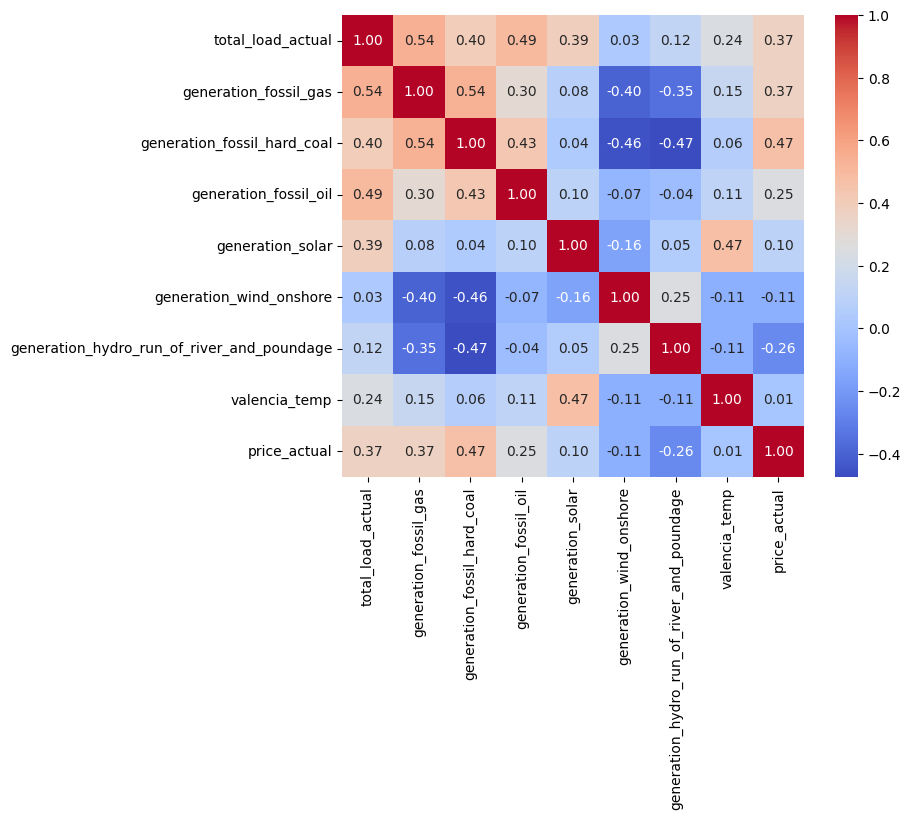

In [12]:
corr = train_sub.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.show()
print()

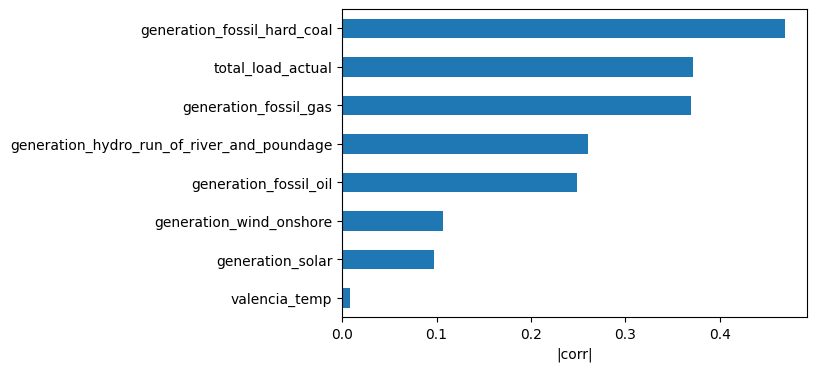

In [13]:
abs_corr = corr["price_actual"].drop("price_actual").abs().sort_values(ascending=True)
abs_corr.plot(kind="barh", figsize=(6,4))
plt.xlabel("|corr|")
plt.show()

可視化した結果、以下のことが読み取れます。<br>
・目的変数`price_actual`は以下の特徴量と正の相関がある
- 化石燃料系`generation_fossil_hard_coal`, `generation_fossil_gas`, `generation_fossil_oil`
- 電力需要`total_load_actual`

<b>→「高コストの火力が増える」「電力需要が高い」と電力価格が上がる傾向</b><br>
<br>

・逆に再生可能エネルギー`generation_hydro_run_of_river_and_poundage`, `generation_wind_onshore`とは負の相関がある

<b>→「再エネの比率が高い」と電力価格が下がる傾向</b><br>
<br>

・気温`valencia_temp`との相関は小さい

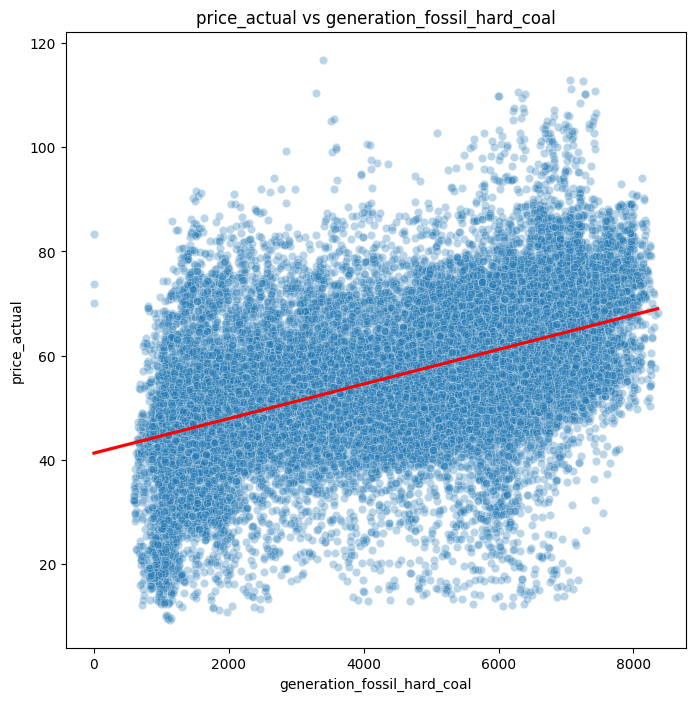

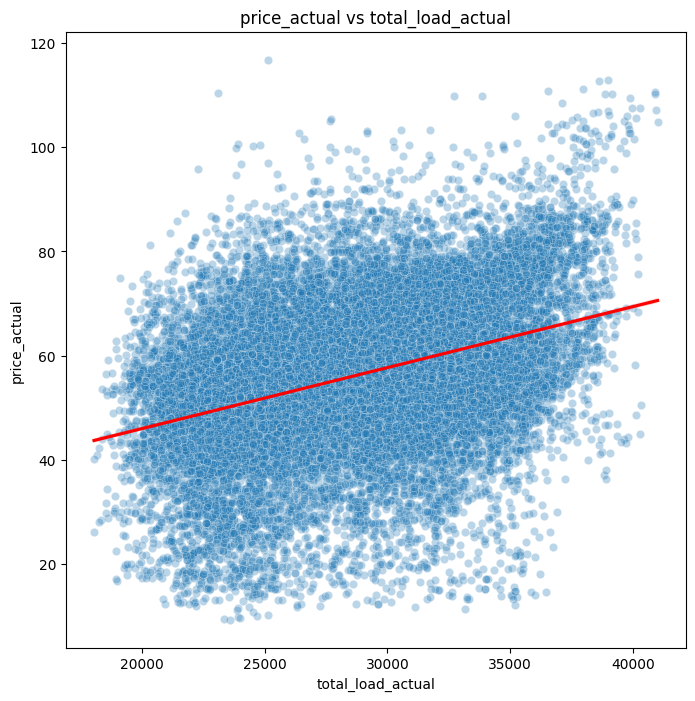

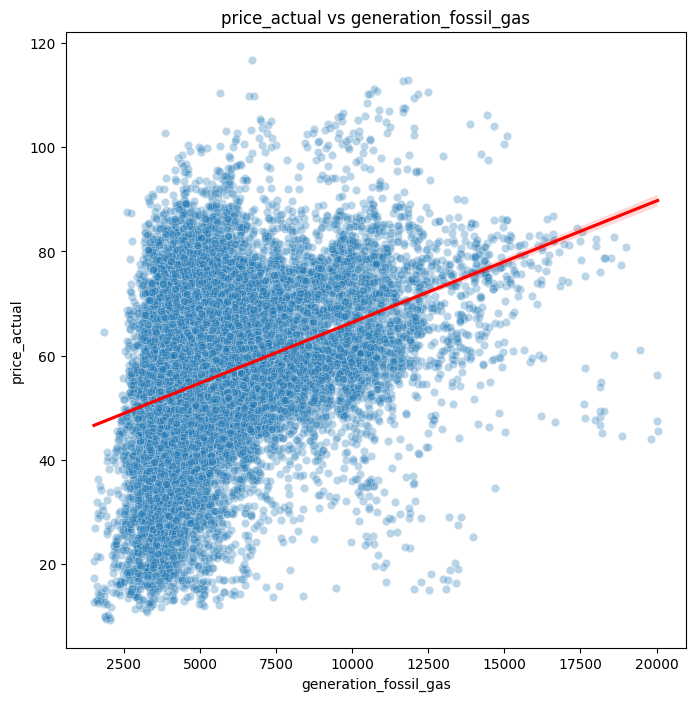

In [14]:
# 目的変数と特に相関が高い3つの特徴量の散布図を可視化
top3 = abs_corr.sort_values(ascending=False).head(3).index.tolist()

for col in top3:
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=train_sub[col], y=train_sub["price_actual"], alpha=0.3)
    sns.regplot(x=train_sub[col], y=train_sub["price_actual"],
                scatter=False, color="red")
    plt.title(f"price_actual vs {col}")
    plt.show()

続いて、気温が極端（暑すぎる、寒すぎる）な場合、電力価格`price_actual`に影響があるかを確認します。<br>
確認の方法は、快適な温度を20℃と仮定したとき、その快適な温度から離れるほど価格が高くなるかを可視化します。

In [15]:
COMFORT = 20.0 # 快適温度 ≈ 20 ℃ と仮定
train_sub["temp_C"] = train_sub["valencia_temp"] - 273.15 # ケルビンから摂氏に変換
train_sub["temp_dev"] = (train_sub["temp_C"] - COMFORT).abs() # 20℃からどれぐらい離れているかを計算しtemp_devという特徴量を作成

# testデータにも同様の特徴量を追加
test_sub["temp_C"] = test_sub["valencia_temp"] - 273.15
test_sub["temp_dev"] = (test_sub["temp_C"] - COMFORT).abs()

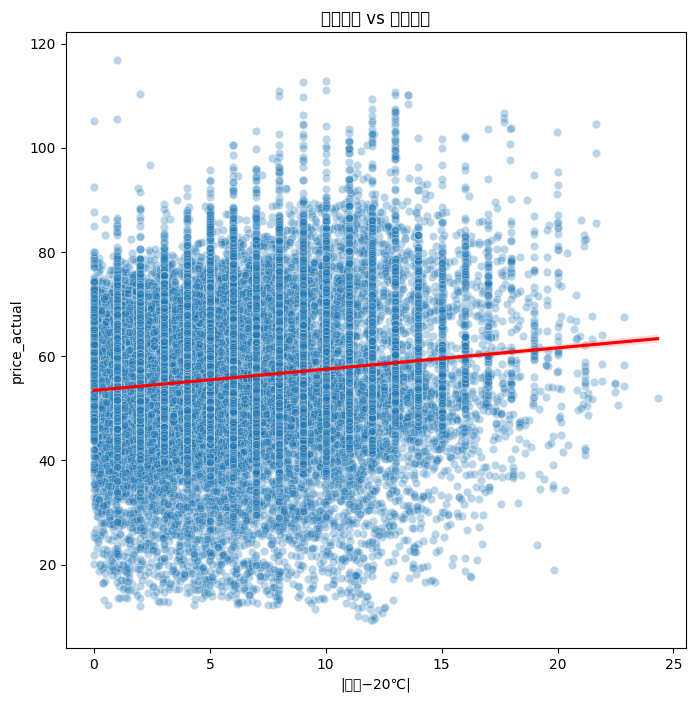

In [16]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=train_sub["temp_dev"], y=train_sub["price_actual"], alpha=0.3)
sns.regplot(x=train_sub["temp_dev"], y=train_sub["price_actual"],
            scatter=False, color="red")
plt.xlabel("|気温−20℃|")
plt.ylabel("price_actual")
plt.title("電力価格 vs 気温偏差")
plt.show()

In [17]:
corr_temp = train_sub["temp_dev"].corr(train_sub["price_actual"])
print(f"気温偏差と需要の相関: {corr_temp:.4f}")

気温偏差と需要の相関: 0.1217


この結果から、快適な気温から離れるほど、電力価格が<b>少し上昇する</b>傾向があることがわかりました。

ここまでの結果から以下の特徴量をモデリングに採用します。
- `total_load_actual`
- `generation_solar`
- `generation_wind_onshore`
- `generation_hydro_run_of_river_and_poundage`
- `generation_fossil_gas`
- `generation_fossil_hard_coal`
- `generation_fossil_oil`
- `temp_dev`

In [18]:
select_col = [
    'total_load_actual',
    'generation_solar',
    'generation_wind_onshore',
    'generation_hydro_run_of_river_and_poundage',
    'generation_fossil_gas',
    'generation_fossil_hard_coal',
    'generation_fossil_oil',
    'temp_dev',
    'price_actual',
]
train_selected = train_sub[select_col]
test_selected = test_sub[select_col[:-1]]

## 3. ルールの理解・OK/NGの体的な処理例

時系列コンペでは「未来データの混入(=リーク)」が最大の落とし穴です。  
下表では、比較的使われる前処理・特徴量作成手法について **“どこまでが OK で、どこからが NG か”** を具体例付きで整理しました。  
まずは全体像を把握し、自分のパイプラインが OK の列に収まっているか確認しましょう。
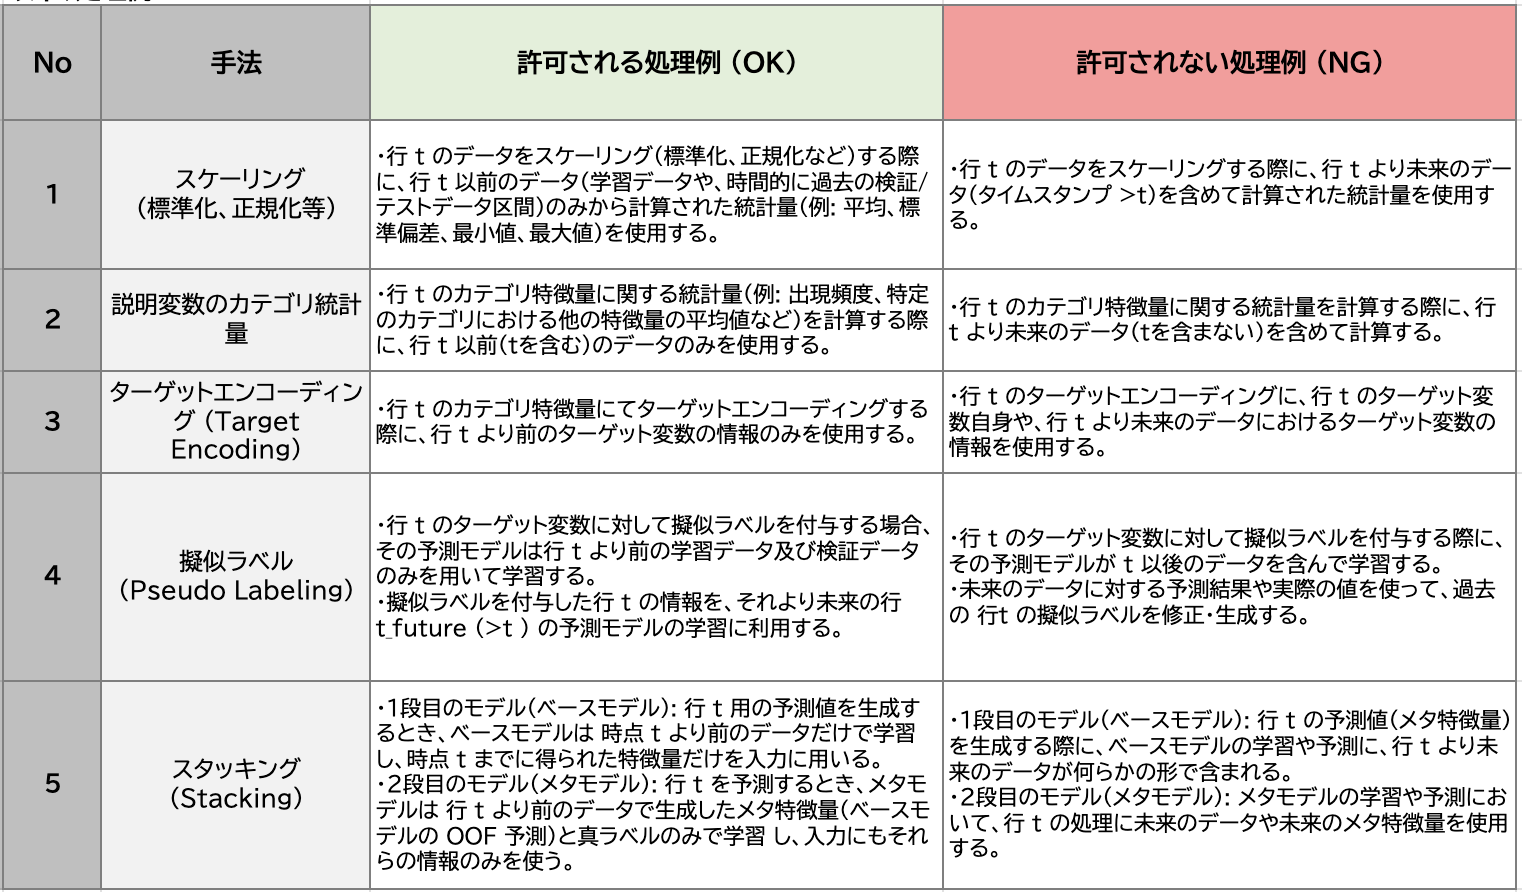

まず、直前の数値（直前がNaNの場合は最も近い過去の数値）で欠損値補完を行います。その後、本チュートリアルでは1の「スケーリング」処理のみ、OK/NGのそれぞれの具体的なコードを確認します。

In [14]:
# 欠損値補完
train_selected.ffill(inplace=True)
test_selected.ffill(inplace=True)

「スケーリング」の処理例
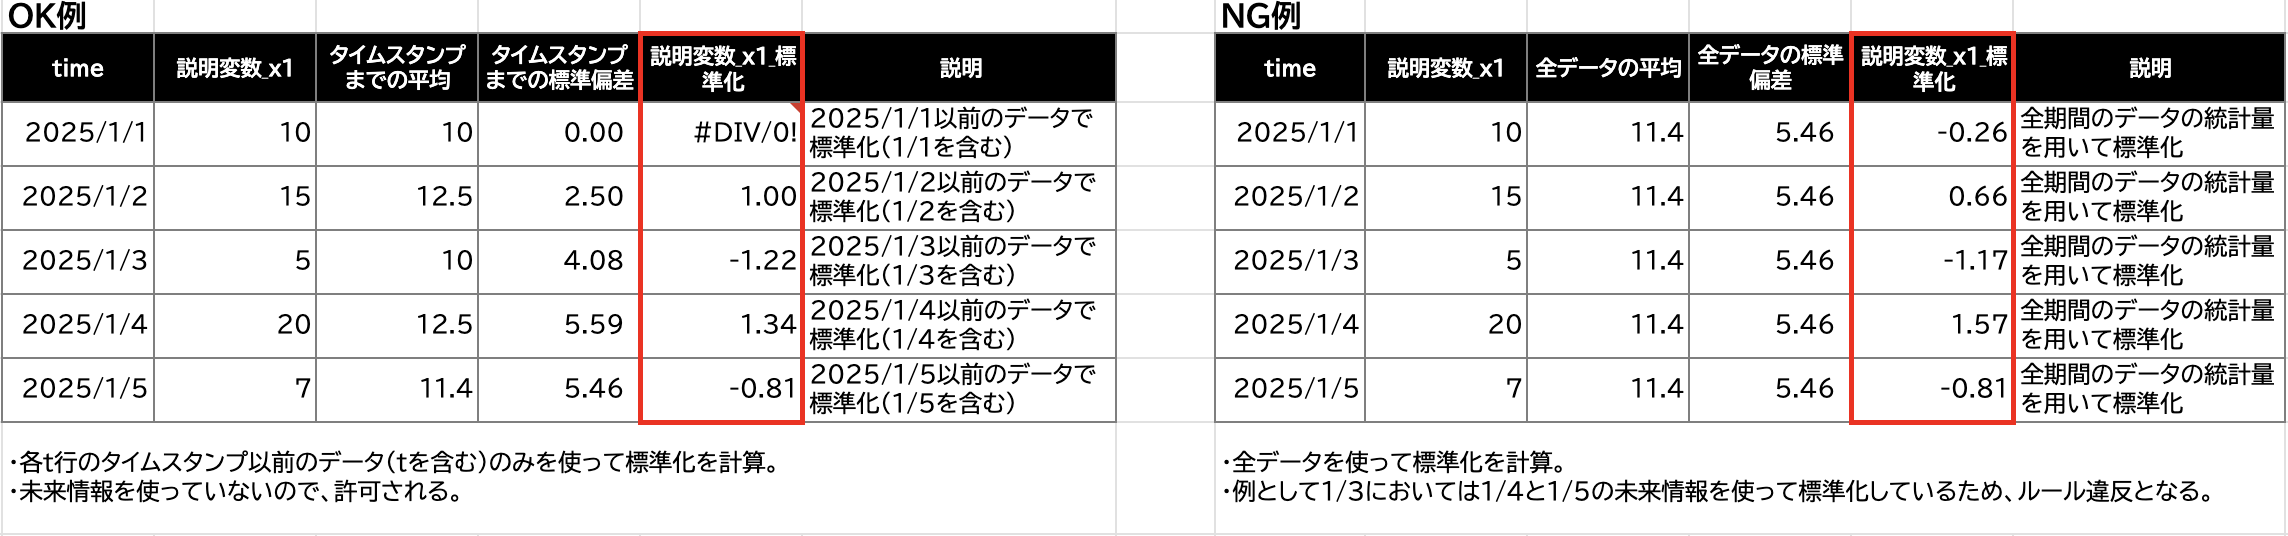

In [15]:
# 目的変数以外のカラムを標準化
scale_cols = [c for c in train_selected.columns if c != "price_actual"]
# OK / NGをそれぞれ別のデータフレームで作成
train_ok = train_selected.copy()
train_ng = train_selected.copy()

In [16]:
# OK 版：行 t 以前だけで平均・標準偏差を更新しながら標準化（expanding().mean()/std() を使う）
for col in scale_cols:
    # 平均と標準偏差を逐次更新
    train_ok[f"{col}_mean_to_t"] = train_ok[col].expanding().mean()
    train_ok[f"{col}_std_to_t"]  = train_ok[col].expanding().std(ddof=0)

    # 0除算を避けるため std==0 の行は NaN に
    train_ok[f"{col}_scaled"] = (
        (train_ok[col] - train_ok[f"{col}_mean_to_t"]) /
        train_ok[f"{col}_std_to_t"]
    )

In [17]:
# NG 版：全期間の平均・標準偏差で標準化（未来リーク）
for col in scale_cols:
    mu  = train_ng[col].mean()
    std = train_ng[col].std(ddof=0)
    train_ng[f"{col}_scaled"] = (train_ng[col] - mu) / std

In [18]:
print("◆ OK（リークなし）")
display(train_ok[[*(f"{c}_scaled" for c in scale_cols) ]].head())

print("\n◆ NG（未来情報で標準化：参考）")
display(train_ng[[*(f"{c}_scaled" for c in scale_cols) ]].head())

◆ OK（リークなし）


total_load_actual_scaled  generation_solar_scaled  \
time                                                                           
2015-01-02 00:00:00+01:00                       NaN                      NaN   
2015-01-02 01:00:00+01:00                 -1.000000                 1.000000   
2015-01-02 02:00:00+01:00                 -1.311200                 0.707107   
2015-01-02 03:00:00+01:00                 -1.379864                 0.577350   
2015-01-02 04:00:00+01:00                 -1.345247                -1.984572   

                           generation_wind_onshore_scaled  \
time                                                        
2015-01-02 00:00:00+01:00                             NaN   
2015-01-02 01:00:00+01:00                       -1.000000   
2015-01-02 02:00:00+01:00                       -1.197652   
2015-01-02 03:00:00+01:00                       -1.156156   
2015-01-02 04:00:00+01:00                       -1.275557   

                           generation_hydro_run_of_river_and_poundage_scaled  \
time                                                                           
2015-01-02 00:00:00+01:00                                                NaN   
2015-01-02 01:00:00+01:00                                          -1.000000   
2015-01-02 02:00:00+01:00                                          -1.192166   
2015-01-02 03:00:00+01:00                                          -1.207589   
2015-01-02 04:00:00+01:00                                          -0.885225   

                           generation_fossil_gas_scaled  \
time                                                      
2015-01-02 00:00:00+01:00                           NaN   
2015-01-02 01:00:00+01:00                      1.000000   
2015-01-02 02:00:00+01:00                     -0.666844   
2015-01-02 03:00:00+01:00                     -1.549117   
2015-01-02 04:00:00+01:00                     -1.380235   

                           generation_fossil_hard_coal_scaled  \
time                                                            
2015-01-02 00:00:00+01:00                                 NaN   
2015-01-02 01:00:00+01:00                           -1.000000   
2015-01-02 02:00:00+01:00                           -1.363200   
2015-01-02 03:00:00+01:00                           -1.637686   
2015-01-02 04:00:00+01:00                           -1.544575   

                           generation_fossil_oil_scaled  temp_dev_scaled  
time                                                                      
2015-01-02 00:00:00+01:00                           NaN              NaN  
2015-01-02 01:00:00+01:00                     -1.000000              NaN  
2015-01-02 02:00:00+01:00                     -0.925820         1.414214  
2015-01-02 03:00:00+01:00                      0.390567         1.000000  
2015-01-02 04:00:00+01:00                     -1.207020         0.816497


◆ NG（未来情報で標準化：参考）


total_load_actual_scaled  generation_solar_scaled  \
time                                                                           
2015-01-02 00:00:00+01:00                 -0.701992                -0.832784   
2015-01-02 01:00:00+01:00                 -0.922388                -0.832191   
2015-01-02 02:00:00+01:00                 -1.284514                -0.832191   
2015-01-02 03:00:00+01:00                 -1.602693                -0.832191   
2015-01-02 04:00:00+01:00                 -1.827264                -0.836933   

                           generation_wind_onshore_scaled  \
time                                                        
2015-01-02 00:00:00+01:00                        0.301538   
2015-01-02 01:00:00+01:00                        0.147913   
2015-01-02 02:00:00+01:00                        0.012861   
2015-01-02 03:00:00+01:00                       -0.057340   
2015-01-02 04:00:00+01:00                       -0.152726   

                           generation_hydro_run_of_river_and_poundage_scaled  \
time                                                                           
2015-01-02 00:00:00+01:00                                           0.440192   
2015-01-02 01:00:00+01:00                                           0.326517   
2015-01-02 02:00:00+01:00                                           0.229081   
2015-01-02 03:00:00+01:00                                           0.164124   
2015-01-02 04:00:00+01:00                                           0.174950   

                           generation_fossil_gas_scaled  \
time                                                      
2015-01-02 00:00:00+01:00                     -0.315020   
2015-01-02 01:00:00+01:00                     -0.160063   
2015-01-02 02:00:00+01:00                     -0.309297   
2015-01-02 03:00:00+01:00                     -0.548336   
2015-01-02 04:00:00+01:00                     -0.629337   

                           generation_fossil_hard_coal_scaled  \
time                                                            
2015-01-02 00:00:00+01:00                            0.184066   
2015-01-02 01:00:00+01:00                            0.151528   
2015-01-02 02:00:00+01:00                            0.065747   
2015-01-02 03:00:00+01:00                           -0.156101   
2015-01-02 04:00:00+01:00                           -0.299563   

                           generation_fossil_oil_scaled  temp_dev_scaled  
time                                                                      
2015-01-02 00:00:00+01:00                     -2.624996         3.642475  
2015-01-02 01:00:00+01:00                     -2.699030         3.642475  
2015-01-02 02:00:00+01:00                     -2.717539         3.774787  
2015-01-02 03:00:00+01:00                     -2.662013         3.774787  
2015-01-02 04:00:00+01:00                     -2.736047         3.774787

In [19]:
test_ok = test_selected.copy()
for col in scale_cols:
    mu_train = train_ok[f"{col}_mean_to_t"].iloc[-1]
    std_train = train_ok[f"{col}_std_to_t"].iloc[-1]
    test_ok[f"{col}_scaled"] = (test_ok[col] - mu_train) / std_train

以下、その他の前処理のOK/NGのイメージを掲載します。ぜひ参考にしてください。

「説明変数のカテゴリ統計量」の処理例
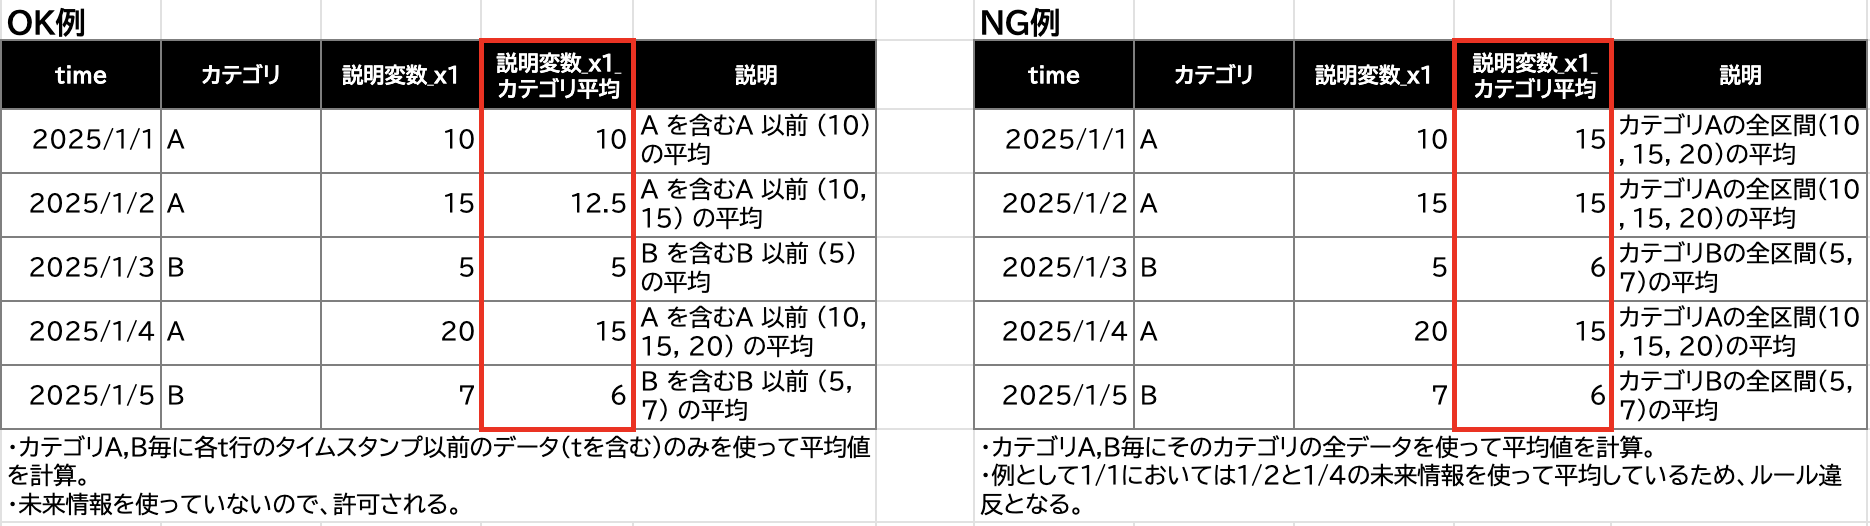

「ターゲットエンコーディング」の処理例
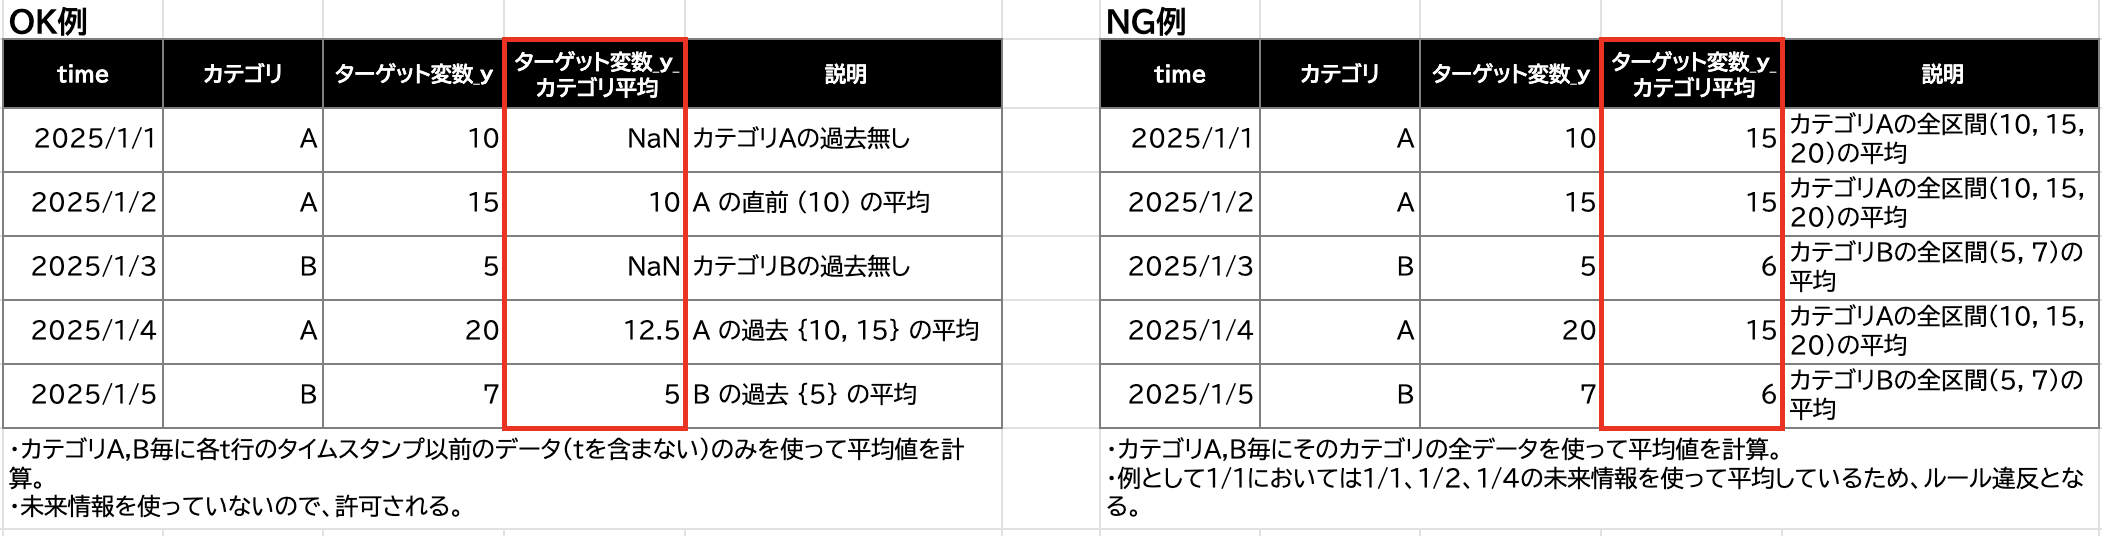

「擬似ラベル」の処理例
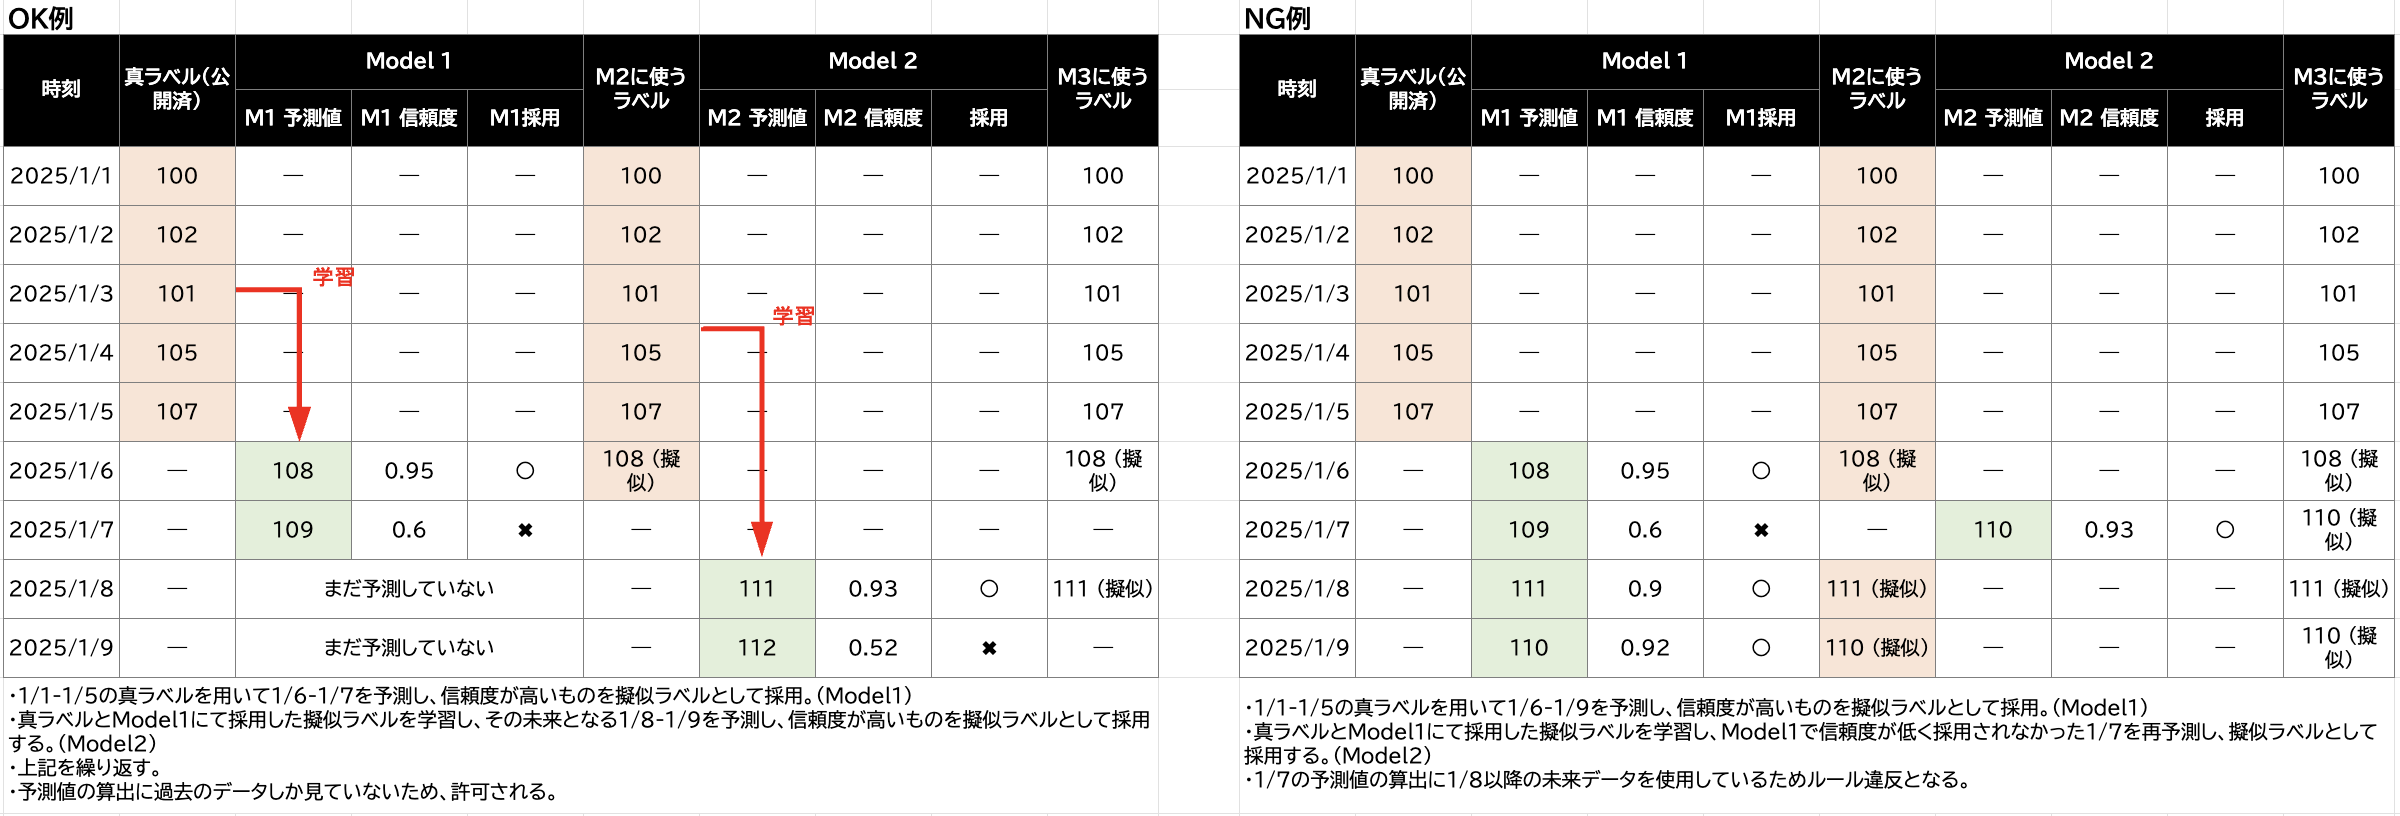

「スタッキング」の処理例
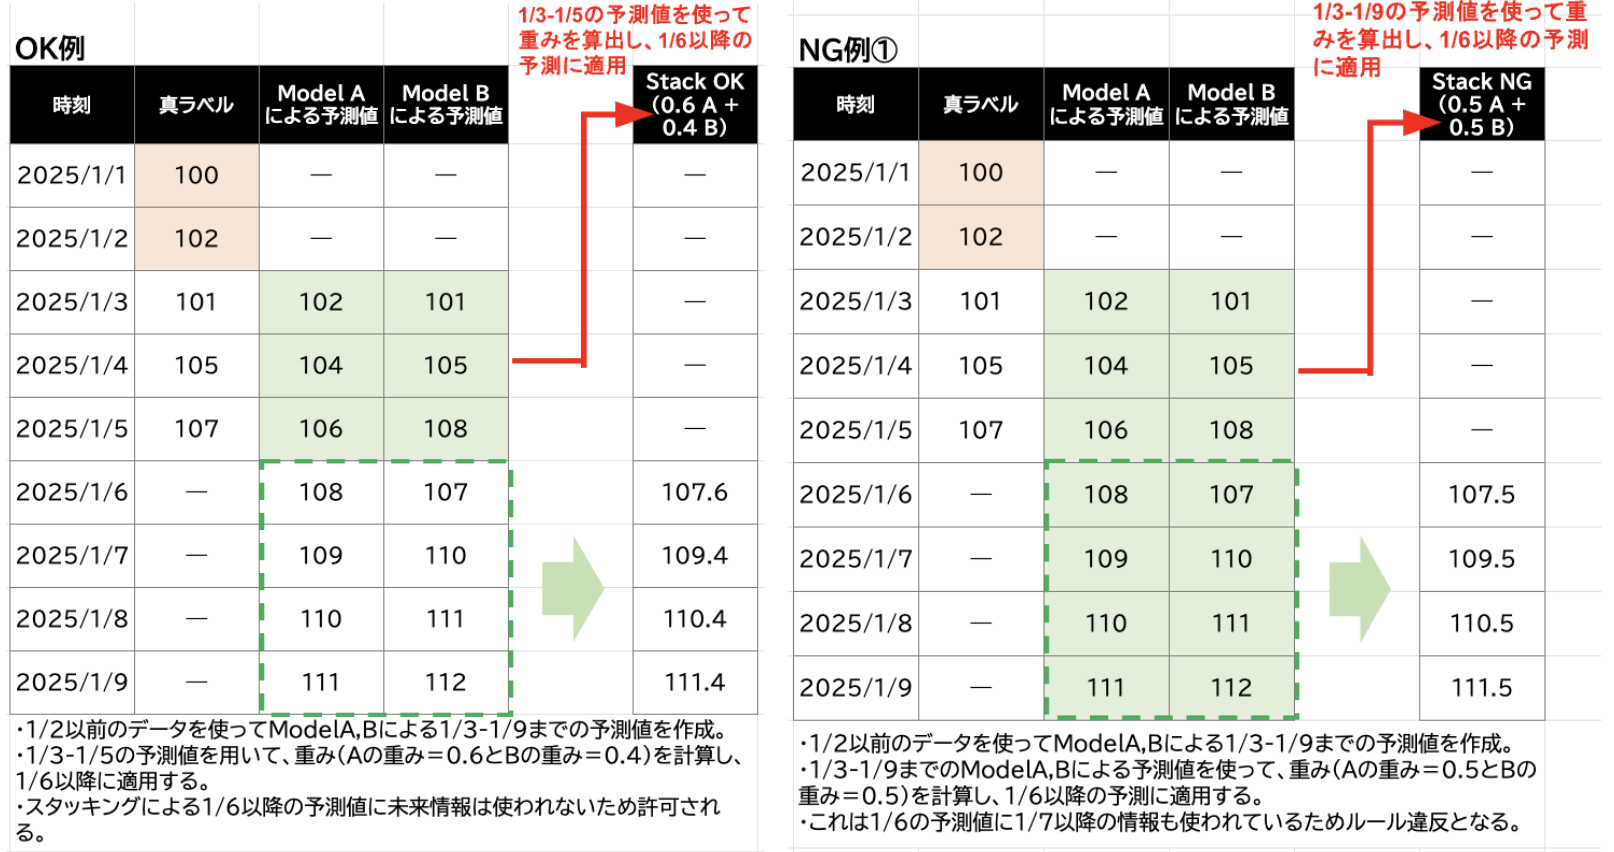




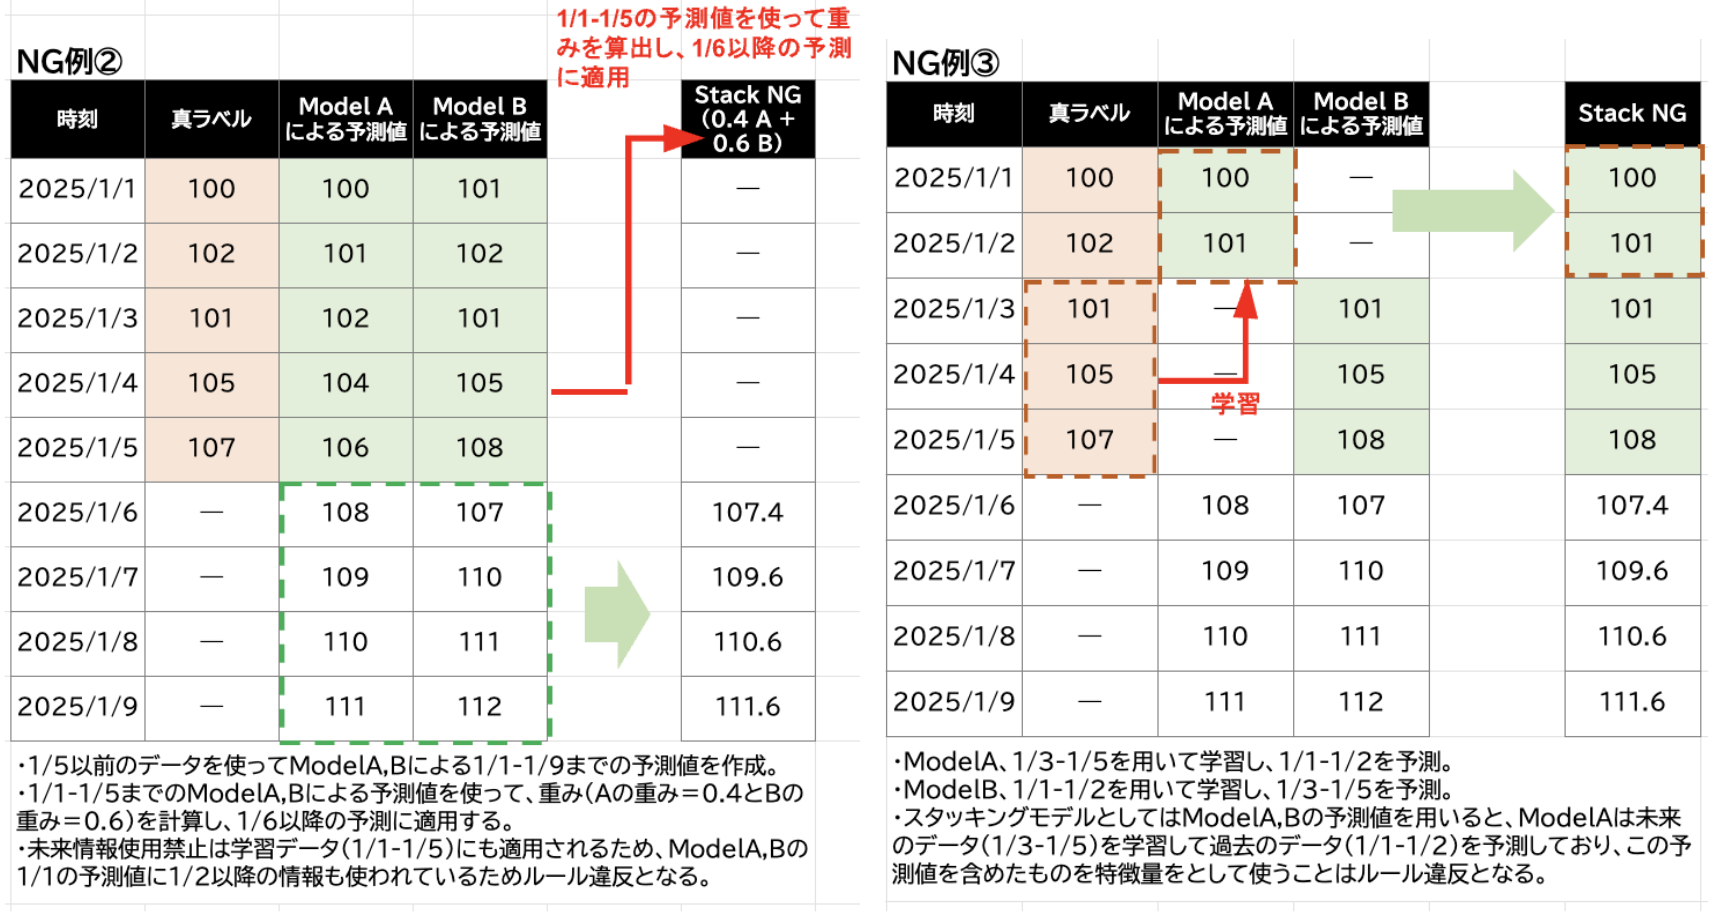

## 4. モデリング

モデリングをするため、次の準備を行います。
1. 学習用データセットを学習用 (2017年以前) と検証用 (2017年) のデータセットへ分割
2. 学習用データセットに含まれる特徴量と目的変数の分離

In [20]:
# yearで分割するためindexをDatetimeIndex化
train_ok.index = pd.to_datetime(train_ok.index, errors="coerce", utc=True)
train_ok.index = train_ok.index.tz_convert("Etc/GMT-1")

# 2017 年をバリデーションに分割
val_mask = train_ok.index.year == 2017
train_mask = ~val_mask

In [21]:
# 標準化した特徴量のみを選択
feature_cols = [c for c in train_ok.columns if c.endswith("_scaled")]

X_train = train_ok.loc[train_mask, feature_cols]
y_train = train_ok.loc[train_mask, 'price_actual']
X_val = train_ok.loc[val_mask, feature_cols]
y_val = train_ok.loc[val_mask, 'price_actual']
X_test = test_ok[feature_cols]

print(f"train rows: {len(X_train)}   val rows: {len(X_val)}")

train rows: 17520   val rows: 8760


In [22]:
# 「未来データの混入(=リーク)」のない標準化による1行目の欠損は0で埋める
X_train.fillna(0, inplace=True)

表データの回帰問題には勾配ブースティング系（LightGBM など）が定番ですが、  
本チュートリアルは **線形回帰** でベースラインを作ります。  
線形回帰は

1. **シンプル & 高速**  
   * 係数と切片のみ。ハイパーパラメータ調整が不要  
   * スケーリング済み数値をそのまま投入し、学習は一瞬で完了
2. **解釈しやすい**  
   * 各係数が「特徴量が 1 上がると予測値が何だけ増減するか」を示す  
   * どの要因が価格に効いているかが直感的に分かる

という長所があり、**ルールを守った前処理が機能しているか** を手早く確認するのに最適です。

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

これでモデルの学習が完了しました。<br>
あらかじめ分けておいた検証用データで訓練済みモデルの予測性能を確認しましょう。<br>
本コンペティションで使用する評価指標はRMSEですのでscikit-learnからroot_mean_squared_errorを呼び出して評価します。

In [24]:
y_pred = model.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print("\n=== 2017 Validation Metrics ===")
print(f"RMSE: {rmse:,.3f}")


=== 2017 Validation Metrics ===
RMSE: 11.597


## 5. 予測・投稿

最後に学習したモデルでテストデータ予測し、投稿ファイルを作成します。

In [25]:
y_test_pred = model.predict(X_test)

テストデータの予測ができました。<br>
見本のsample_submission.csvを用いて投稿ファイルを作成しましょう。

In [26]:
# sample_submission に書き込み & 保存
sample_submission_df[1] = y_test_pred

In [27]:
sample_submission_df

0          1
0     2018-01-01 00:00:00+01:00  38.955145
1     2018-01-01 01:00:00+01:00  37.888417
2     2018-01-01 02:00:00+01:00  37.361214
3     2018-01-01 03:00:00+01:00  37.268506
4     2018-01-01 04:00:00+01:00  37.251944
...                         ...        ...
8755  2018-12-31 19:00:00+01:00  43.660374
8756  2018-12-31 20:00:00+01:00  44.218742
8757  2018-12-31 21:00:00+01:00  44.344986
8758  2018-12-31 22:00:00+01:00  43.855402
8759  2018-12-31 23:00:00+01:00  43.454834

[8760 rows x 2 columns]

In [28]:
sample_submission_df.to_csv(data_path+'tutorial.csv', header=False, index=False)

これで本チュートリアルは終了です。<br>
早速作成したsubmission_tutorial.csvを投稿してみましょう。<br>
コンペサイトの投稿ボタンから投稿可能です。

次のステップはスコアアップです。<br>
以下の観点をヒントにモデリングしてみてください！
- 需要`total_load_actual`は現時点から24時間前の数値です。天候などの情報から、より現時点に近い需要予測特徴量を作成してみましょう。
- 今回のモデルは線形回帰ですが、時系列データということも踏まえてさまざまなモデルを使ってみましょう